In [1]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp37-none-any.whl size=4349 sha256=45887543b243e0a21e2eb9df5eeeae76e0b8854b250e5daf0eee52b026e19233
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [ ]:
!mkdir /content/data
!wget -0 /content/data/audrey01.jpg https://github.com/chulminkw/DLCV/data/image/audrey01.jpg

img size : (760, 1140, 3)


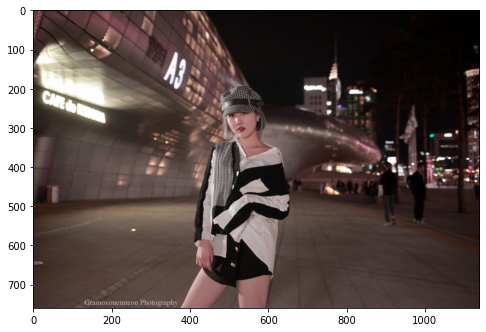

In [46]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os

img = cv2.imread('/content/drive/MyDrive/인프런 - 딥러닝 컴퓨터 비전 완벽가이드/Files/Selective_search/Selective_search_picture.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img size :',img.shape)

plt.figure(figsize = (8,8))
plt.imshow(img_rgb)
plt.show()

In [21]:
import selectivesearch

_, region = selectivesearch.selective_search(img_rgb, scale = 200, min_size = 2000)

print(type(region), len(region))
#region에 있는 rect의 크기과 size의 값은 같지 않을수도있다.

<class 'list'> 101


In [26]:
region[:10]

[{'labels': [0.0], 'rect': (0, 0, 63, 141), 'size': 4091},
 {'labels': [1.0], 'rect': (19, 0, 165, 127), 'size': 9798},
 {'labels': [2.0], 'rect': (58, 0, 88, 49), 'size': 2494},
 {'labels': [3.0], 'rect': (129, 0, 119, 65), 'size': 3474},
 {'labels': [4.0], 'rect': (199, 0, 239, 236), 'size': 27168},
 {'labels': [5.0], 'rect': (310, 0, 122, 124), 'size': 4371},
 {'labels': [6.0], 'rect': (379, 0, 90, 114), 'size': 5142},
 {'labels': [7.0], 'rect': (424, 0, 715, 451), 'size': 159773},
 {'labels': [8.0], 'rect': (137, 6, 68, 74), 'size': 2472},
 {'labels': [9.0], 'rect': (115, 41, 109, 77), 'size': 2527}]

In [24]:
#rect 정보 추출하기
cand_rect = [cand['rect'] for cand in region]
print(cand_rect)

[(0, 0, 63, 141), (19, 0, 165, 127), (58, 0, 88, 49), (129, 0, 119, 65), (199, 0, 239, 236), (310, 0, 122, 124), (379, 0, 90, 114), (424, 0, 715, 451), (137, 6, 68, 74), (115, 41, 109, 77), (398, 45, 153, 217), (287, 63, 54, 85), (10, 84, 337, 211), (0, 88, 438, 397), (0, 131, 185, 110), (552, 132, 327, 201), (1102, 151, 37, 138), (1001, 179, 138, 343), (669, 194, 92, 73), (482, 215, 128, 185), (926, 215, 35, 126), (374, 243, 120, 217), (535, 245, 360, 220), (828, 250, 149, 170), (453, 282, 62, 146), (1098, 300, 41, 125), (745, 305, 140, 63), (0, 325, 46, 81), (458, 334, 205, 198), (694, 334, 233, 88), (280, 351, 84, 74), (528, 351, 107, 59), (430, 355, 41, 237), (947, 360, 62, 172), (459, 364, 51, 135), (411, 368, 45, 223), (1002, 390, 86, 123), (886, 392, 129, 169), (583, 408, 556, 351), (242, 417, 186, 68), (625, 422, 271, 112), (0, 443, 447, 316), (460, 471, 193, 87), (487, 491, 164, 77), (433, 505, 177, 235), (501, 515, 122, 171), (412, 585, 48, 78), (378, 660, 117, 99), (523, 678

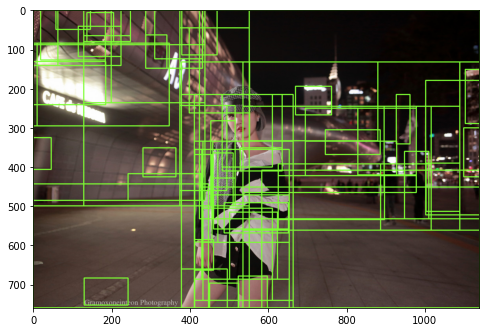

In [33]:
green_rgb = (125,255,51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rect:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy =  cv2.rectangle(img_rgb_copy, (left,top), (right,bottom), color = green_rgb, thickness = 2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

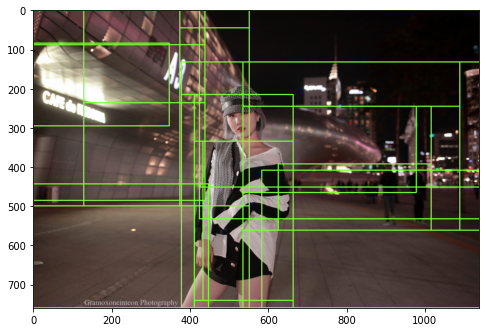

In [39]:
# bounding box의 크기가 큰 후보만 추출
cand_rect_2 = [cand['rect'] for cand in region if cand['size'] > 30000]
img_rgb_copy = img_rgb.copy()
for rect in cand_rect_2:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy =  cv2.rectangle(img_rgb_copy, (left,top), (right,bottom), color = green_rgb, thickness = 2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

# IOU(Intersection Over Union)
구하는 방법은 Area of Overlap / Area of Union

Area of  Union = Ground truth + Predicted - intersection

In [41]:
import numpy as np

def compute_iou(cand_box, gt_box):
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.minimum(cand_box[2], gt_box[2])
  y2 = np.minimum(cand_box[3], gt_box[3])

  intersection = np.maximum(x2-x1, 0) * np.maximum(y2-y1, 0)

  cand_box_area = (cand_box[2]-cand_box[0]) * (cand_box[3]-cand_box[1])
  gt_box_area = (gt_box[2]-gt_box[0]) * (gt_box[3]-gt_box[1])

  iou = intersection / (cand_box_area + gt_box_area - intersection)
  return iou

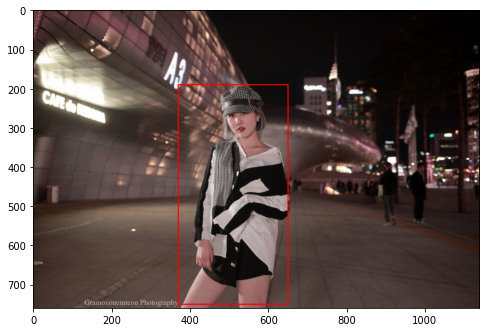

In [62]:
gt_box = [370, 190, 650, 750]
img_rgb_gt = img_rgb.copy()
img_rgb_gt = cv2.rectangle(img_rgb_gt, (gt_box[0],gt_box[1]), (gt_box[2],gt_box[3]), color = (255,0,0), thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb_gt)
plt.show()

In [ ]:
for index, cand_box in enumerate(cand_rect):
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  print('index :', index, 'iou :', iou)

index : 6 iou : 0.543577783536322
index : 14 iou : 0.5986870519132763
index : 24 iou : 0.7668449197860963
index : 25 iou : 0.7701643748155376
index : 26 iou : 0.8749398749398749
index : 32 iou : 0.8749398749398749


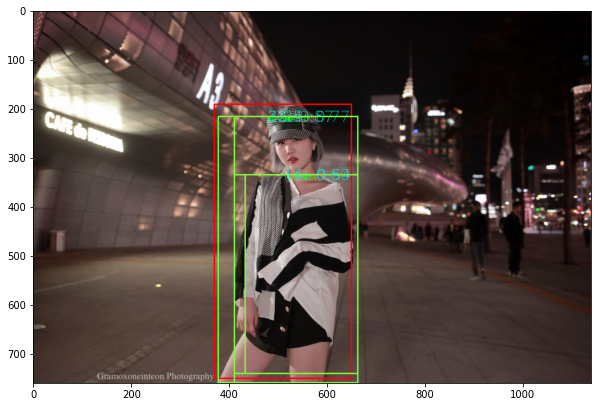

In [68]:
for index, cand_box in enumerate(cand_rect_2) :
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  if iou > 0.5:
    print('index :', index, 'iou :', iou)
    cv2.rectangle(img_rgb_gt, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color = green_rgb, thickness = 2)
    text = "{}: {:.2f}".format(index, iou)
    cv2.putText(img_rgb_gt, text, (cand_box[0]+100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, color = (0,255,255), thickness=1)

plt.figure(figsize = (10,10))
plt.imshow(img_rgb_gt)
plt.show()